# Latar Belakang


# Pendahuluan

Amazon Web Services (AWS) adalah perusahan teknologi berbasis *cloud* yang menyediakan berbagai macam solusi teknologi untuk klien perusahaan-perusahaan internasional (*Business-to-Business*/B2B). Bermula dari inisiatif perusahaan Amazon.com untuk menyediakan layanan penyimpanan berbasis internet di tahun 2006 dengan layanan *Simple Storage Service* (S3), AWS telah bertumbuh untuk menyediakan layanan-layanan dari *data center* yang tersebar di seluruh penjuru dunia (https://aws.amazon.com/about-aws/our-origins/)

 Pada kuartal pertama tahun 2025, Amazon Web Services (AWS) mencatatkan pendapatan sebesar $29,3 miliar, meningkat 17% dibandingkan periode yang sama tahun sebelumnya. Meskipun pertumbuhan ini menunjukkan peningkatan, angka tersebut sedikit di bawah ekspektasi analis yang memproyeksikan pendapatan sekitar $29,42 miliar.([https://www.shacknews.com]https://www.shacknews.com/article/144120/amazon-amzn-q1-2025-aws-revenue-misses-expectations)

Dengan klien yang tersebar di seluruh penjuru dunia dan jumlah produk yang mencapai ratusan jenis, maka perlu dilakukan analisa untuk mengetahui performa sales dan penjualan unit secara wilayah internasional untuk mengetahui wilayah yang memerlukan perhatian khusus.  

## Problem Statement
 Selama tahun 2020–2023 berhasil melakukan penjualan di 3 Wilayah berbeda yaitu Asia Pacific & Japan (APJ), EMEA (Europe, Middle East dan Africa) dan AMER (America)  Selama tahun 2020–2023, peruhasaan ini melakukan evaluasi sales dan unit terjual apakah terdapat perbedaan yang mencolok dalam jumlah sales dan unit terjual di antara tiga region, yang dapat mengindikasikan adanya masalah dalam strategi pemasaran, atau potensi pasar yang belum dimaksimalkan.

 ## rumusan Masalah 
 1. Apakah terdapat perbedaan signifikan dalam jumlah sales dan unit terjual antara wilayah Asia Pacific & Japan (APJ), EMEA, dan AMER selama periode 2020–2023?

 2. Jika perbedaan tersebut ada, apakah hal ini menunjukkan adanya kendala dalam strategi pemasaran yang diterapkan di salah satu atau beberapa wilayah?

 3. Apakah terdapat potensi pasar yang belum dimaksimalkan secara optimal di wilayah tertentu berdasarkan perbedaan performa penjualan tersebut?





In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi data transaksi dari perusahaan SaaS  yang menjual perangkat lunak
penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili
satu produk dalam sebuah transaksi, dan kolom-kolomnya mencakup:
1.  Row ID           : Pengenal unik untuk setiap transaksi.
2.  Order ID         : Pengenal unik untuk setiap pesanan.
3.  Order Date       : Tanggal saat pesanan dilakukan.
4.  Order Key        : Representasi numerik dari tanggal pesanan (YYYYMMDD).
5.  Contact Name     : Nama orang yang melakukan pesanan.
6.  Country          : Negara tempat pesanan dilakukan.
7.  City             : Kota tempat pesanan dilakukan.
8.  Region           : Wilayah tempat pesanan dilakukan.
                        A. EMA  : Europe, Middle East, And Africa
                        B. AMER : Americas
                        C. APJ  : Asia Pacific Japan 
9.  Subregion        : Subwilayah tempat pesanan dilakukan.
                        1. NAMER - Nort America Region (Amerika Utara)
                        2. EU-WEST – Europe Western Region (Eropa Barat)
                        3. UKIR – United Kingdom and Ireland
                        4. LATAM – Latin America (Amerika Latin)
                        5. JAPN – Japan (Jepang)
                        6. ANZ – Australia and New Zealand
                        7. NOR – (Negara-negara Nordik: Norwegia, Swedia, Denmark, Finlandia, Islandia)
                        8. APAC – Asia-Pacific (Asia Pasifik)
                        9. MEA – Middle East and Africa (Timur Tengah dan Afrika)
                        10. EU-EAST – Eastern Europe (Eropa Timur)
                        11. IND – India
                        12. EU - Europe 
10. Customer         : Nama perusahaan yang melakukan pesanan.
11. Customer ID      : Pengenal unik untuk setiap pelanggan.
12. Industry         : Industri tempat pelanggan beroperasi.
13. Segment          : Segmen pelanggan (SMB, Strategic, Enterprise, etc.)
14. Product          : Produk yang dipesan.
15. License          : Kunci lisensi untuk produk tersebut.
16. sales            : Total nilai penjualan untuk transaksi tersebut.
17. Quantity         : Jumlah item dalam transaksi.
18. Discount         : Diskon yang diterapkan pada transaksi.
19. Profit           : Keuntungan dari transaksi.


### SaaS Sales DATA
Berikut adalah 5 Baris atas dan bawah dari dataset sales Saas

In [2]:
df=pd.read_csv("D:\\Modul Purwadhika\\Latihan\\CAPSTONE 2\\SaaS-Sales.csv")
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dataset Saas Sales

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

Disini kita menumukan bahwa tipe data pada kolom Orde Date berupa Object, lalu kita akan mengubah ke format date

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
#Menghitung value Unique dan mengidentifikasi value nya 
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


## Missing Value
disini kita akan melihat apakah ada missing value pada dataset SaaS Sales

In [6]:
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

<Axes: title={'center': 'Missing Value'}>

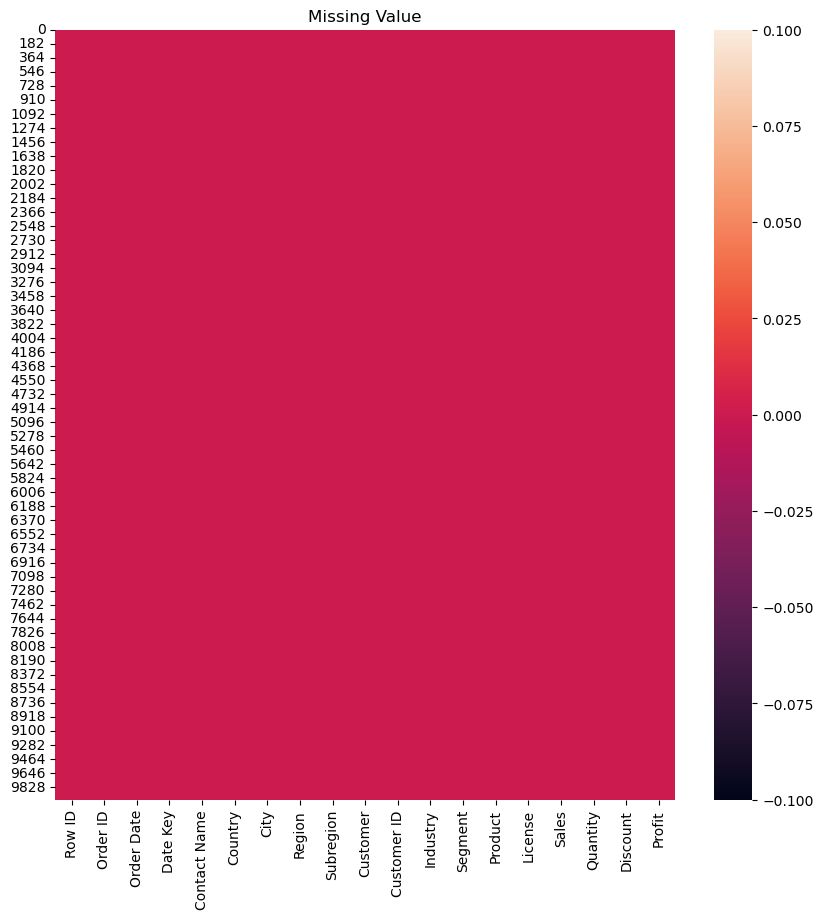

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
plt.title('Missing Value')
sns.heatmap(df.isna())

In [8]:
# Cek apakah ada duplikan atau tidak 
Jumlah_duplicat= df.duplicated().sum()
print('Jumlah data Duplikasi: ',Jumlah_duplicat)

Jumlah data Duplikasi:  0


Secara umum, kita bisa melihat bahwa:
* dataset SaaS Sales memiliki 19 kolom dan 9994 baris
* dataset SaaS Sales tidak terdapat missing value 
* dataset SaaS Sales memiliki order date yang sama tetapi secara pembelian product yang berbeda.
* melakukan pengapusan pada kolom yang tidak di gunakan yaitu kolom Subregion 
* dataset SaaS Sales memiliki kolom yang mirip yaitu kolom datekey dan order date karena kita hanya membutuhkan 1 kolom date maka di sini saya lakukan penhapusan kolom date key
* Pada dataset SaaS Sales ini pada kolom Order Id bila kita lihat ada duplicat bisa kita lihat di row 1 dan 2 order id dari masing maring baris sama, setelah kita cek bisa kita yang berbeda yang di kolom product, license dan seterus nya, hal ini bisa menjadi bukti bahwa customer memesan product yang berbeda di satu waktu yang sama. maka dalam kasus ini saya tida melakukan perubahan apapun.
* pada kolom product ada inskonsitensi penulisan dan perbedaan tier dari aplikasi yang di beli costumer, dalam hal ini kita merapihkan inkonsitensi penulisan dan membuat kolom baru untuk mengidentivikasi perbedaan tier tersebut jadi akan kita buatkan kolom baru untuk versi dari applikasi.



In [9]:
#menghapus kolom date key dan subregion 
df.drop(['Date Key','Subregion'],axis=1,inplace=True)
df

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [10]:
df['Product'].value_counts()

Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

bisa kita lihat di sini Kita bisa melihat bahwa terdapat ketidakkonsistenan dalam penulisan nama produk untuk penulisan ContactMatcher, FinanceHub,OneView berupa tidak terdapat spasi antar katanya oleh karena itu, langkah yang diambil adalah tambahkan spasi antar kata dan u kita akan membuat kolom baru berupa tier product karena ada produk seperti SaaS Connector Pack dan Marketing Suite terdapat dua versi applikasi yaitu SaaS Connector Pack - Gold dan Marketing Suite - Gold akan kita buatkan kolom version terbaru yang berisikan versi dari apps tersebut, hal ini di lakukan agar mempermudah kita dalam analisa produk 

In [11]:
# Standarisasi Penulisan Produk
df["Product"] = df["Product"].str.strip()
df['Product'] = df['Product'].str.replace('ContactMatcher', 'Contact Matcher')
df['Product'] = df['Product'].str.replace('FinanceHub', 'Finance Hub')
df['Product'] = df['Product'].str.replace('OneView', 'One View')
df['Product'] = df['Product'].str.replace('ChatBot Plugin', 'Chat Bot Plugin')
df.head()


,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Finance Hub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,Phillips 66,1056,Energy,Strategic,Finance Hub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Contact Matcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [12]:
##### Penambahan Kolom Tier Produk
# Tambahkan kolom 'Tier' berdasarkan keberadaan kata 'gold'
df['Product Tier'] = df['Product'].apply(lambda x: 'Gold' if 'gold' in x.lower() else 'Full Version')
# memindahkan kolom product agar posisi setelah kolom Product
product_index = df.columns.get_loc('Product')
cols = list(df.columns)
cols.remove('Product Tier')
cols.insert(product_index + 1, 'Product Tier')
df = df[cols]
df["Product Tier"].value_counts()



Product Tier
Full Version    8894
Gold            1100
Name: count, dtype: int64

In [13]:
# HAPUS 'gold' dari kolom Product
df['Product'] = df['Product'].str.replace(r'(?i)\s*-\s*gold', '', regex=True).str.strip()
display(df.head(10),df.tail(10))

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Customer,Customer ID,Industry,Segment,Product,Product Tier,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Marketing Suite,Full Version,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Finance Hub,Full Version,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,Phillips 66,1056,Energy,Strategic,Finance Hub,Full Version,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Contact Matcher,Full Version,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite,Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,Full Version,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,BNP Paribas,1065,Finance,SMB,Chat Bot Plugin,Full Version,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,BNP Paribas,1065,Finance,SMB,Site Analytics,Full Version,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,BNP Paribas,1065,Finance,SMB,Contact Matcher,Full Version,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,BNP Paribas,1065,Finance,SMB,One View,Full Version,71J8P9Z1P0,114.9000,5,0.00,34.4700


,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Customer,Customer ID,Industry,Segment,Product,Product Tier,License,Sales,Quantity,Discount,Profit
9984,9985,EMEA-2021-100251,2021-05-17,Charles Lee,United Kingdom,Leeds,EMEA,UnitedHealth Group,1092,Healthcare,SMB,Finance Hub,Full Version,HR60J3H8TZ,31.500,10,0.0,15.1200
9985,9986,EMEA-2021-100251,2021-05-17,Charles Lee,United Kingdom,Leeds,EMEA,UnitedHealth Group,1092,Healthcare,SMB,Support,Full Version,GM2B5HKSRM,55.600,4,0.0,16.1240
9986,9987,AMER-2022-125794,2022-09-30,Lucas Oliver,United States,New York City,AMER,Panasonic,1091,Tech,SMB,Data Smasher,Full Version,PO8DG1HX3V,36.240,1,0.0,15.2208
9987,9988,EMEA-2023-163629,2023-11-18,Dylan Dickens,Finland,Espoo,EMEA,Siemens,1043,Manufacturing,Strategic,Data Smasher,Full Version,GGI2WZG0KP,79.990,1,0.0,28.7964
9988,9989,EMEA-2023-163629,2023-11-18,Dylan Dickens,Finland,Espoo,EMEA,Siemens,1043,Manufacturing,Strategic,Site Analytics,Full Version,TFALA50KPS,206.100,5,0.0,55.6470
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,Full Version,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,SaaS Connector Pack,Full Version,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,Site Analytics,Full Version,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,American Express,1005,Finance,SMB,Support,Full Version,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,Comcast,1022,Communications,SMB,One View,Full Version,3NTBV9B3PS,243.160,2,0.0,72.9480


Bisa kita lihat penulisan 'Product' sudah seragam dan kolom 'Product Tier' sudah kita tambahkan di sebelah kolom 'Product'.

## Data Bersih 
kita sudah Membersihkan data kita sekarang mali kita lihat data yang sudah bersih 


In [14]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc


,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
3,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
4,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
5,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
6,Region,3,"[EMEA, AMER, APJ]"
7,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
8,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
9,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."


In [15]:
df.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Customer,Customer ID,Industry,Segment,Product,Product Tier,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Marketing Suite,Full Version,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,Chevron,1017,Energy,SMB,Finance Hub,Full Version,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,Phillips 66,1056,Energy,Strategic,Finance Hub,Full Version,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Contact Matcher,Full Version,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite,Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Sebelum dibersihkan, kita memiliki 19 kolom dan 9994 baris, sekarang setelah kita melakukan cleaning data kita memiliki 18 kolom dan 9994. dimana tadi kita menambah 1 kolom untuk Product Tier.

## DATA ANALISIS
Seletah kita melukan data cleaning, sekarang kita memaskin tahapan data analisis untuk menjawab pertanyaan sebagai berikut:

In [16]:
# Kita akan Melihat nilai Mean, Standart deviasi, minimal, Q1, Q2, Q3 dan Maximal 
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# TREN PENJUALAN PERTAHUN 

In [17]:
#menghitung Jumlah transaksi pertahun 
# Ekstrak tahun dari tanggal
df['Year'] = df['Order Date'].dt.year

# Grup berdasarkan tahun dan jumlahkan sales
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
# Grup berdasarkan tahun dan jumlahkan quantity
Q_by_year = df.groupby('Year')['Quantity'].sum().reset_index()

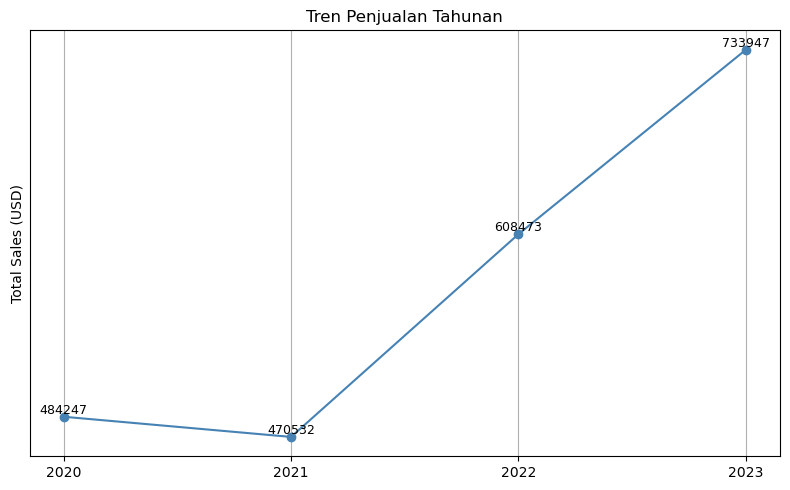

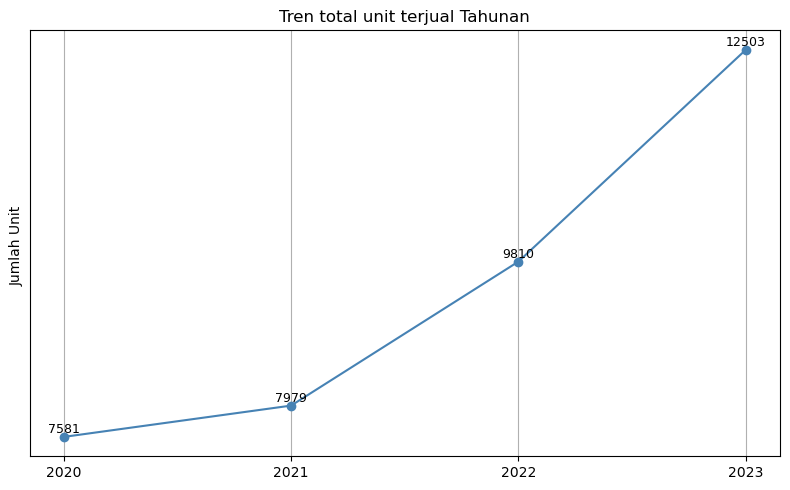

In [18]:
# Plot tren penjualan tahunan
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o', linestyle='-', color='steelblue')

# Tampilkan hanya angka penjualan di marker
for i, row in sales_by_year.iterrows():
    plt.text(row['Year'], row['Sales'] + 10, f"{int(row['Sales'])}", 
             ha='center', va='bottom', fontsize=9)

# Hilangkan label dan ticks di Y-axis
plt.ylabel("Total Sales (USD)")
plt.yticks([])

# Tampilkan tahun sebagai integer di sumbu X
plt.xticks(sales_by_year['Year'].astype(int))

# Tambahkan judul dan grid
plt.title('Tren Penjualan Tahunan')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Plot tren jumlah unit terjual  tahunan
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(Q_by_year['Year'],Q_by_year['Quantity'], marker='o', linestyle='-', color='steelblue')

# Tampilkan hanya angka penjualan di marker
for i, row in Q_by_year.iterrows():
    plt.text(row['Year'], row['Quantity']+ 10, f"{int(row['Quantity'])}", 
             ha='center', va='bottom', fontsize=9)

# Hilangkan label dan ticks di Y-axis
plt.ylabel('Jumlah Unit ')
plt.yticks([])

# Tampilkan tahun sebagai integer di sumbu X
plt.xticks(Q_by_year['Year'].astype(int))

# Tambahkan judul dan grid
plt.title('Tren total unit terjual Tahunan')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

terdapat penurunan penjualan dalam tahun 2020 dan 2021 di karena kan wabah virus covid-19 yang menjangkit seluruh dunia dan di kutip dari https://www.who.int/teams/environment-climate-change-and-health/occupational-health/covid-19-at-work terdapat untuk himbauan untuk kerja secara online selama wabah masing berlangsung, tetapi bila ita lihat nilai penjualan di tahun 2022 sebesar $470.532 lebih kecil dari tahun 2020 sebesar $484.247 hal ini di kutip dari https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Inflation terdapat lonjakan inflasi yang terjadi pada masa pemulihan ekonomi global pasca pandemi covid-19, sehingga hal ini menurunkan daya beli. 

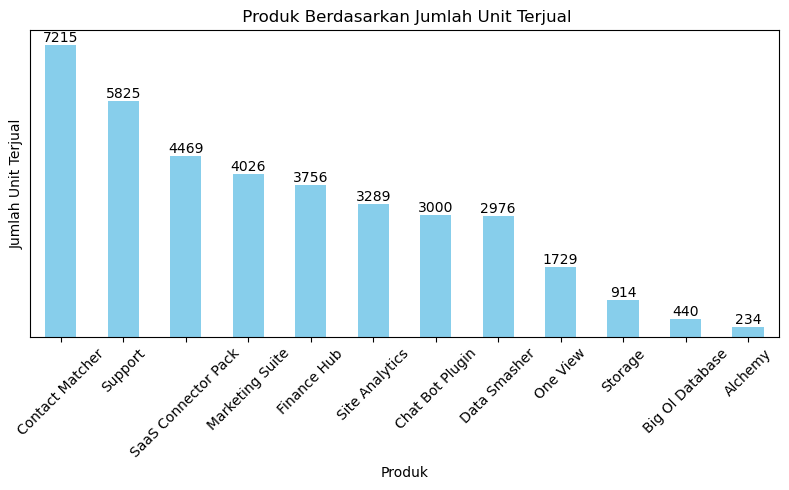

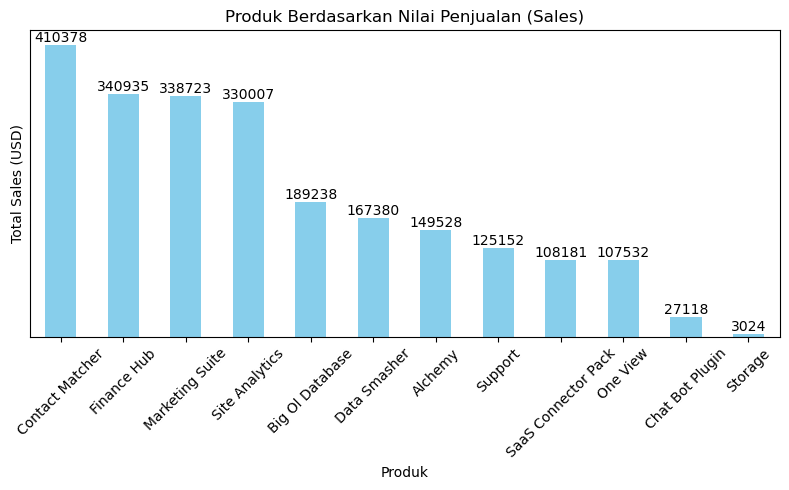

In [19]:
# top 3 Product dalam Penjualan terbanyak 

#Hitung total unit terjual per produk dan ambil 3 teratas
top_quantity_products = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
top_quantity_products.plot(kind='bar', color='skyblue')
plt.title(" Produk Berdasarkan Jumlah Unit Terjual")
plt.xlabel("Produk")
plt.ylabel("Jumlah Unit Terjual")
plt.yticks([])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(top_quantity_products):
    plt.text(index,value + 1, str(int(value)), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# TOP 3 PRODUK BERDASARKAN NILAI PENJUALAN 
 #Hitung total sales per produk dan ambil 3 teratas
top_sales_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
top_sales_products.plot(kind='bar', color='skyblue')
plt.title("Produk Berdasarkan Nilai Penjualan (Sales)")
plt.xlabel("Produk")
plt.ylabel("Total Sales (USD)")
plt.yticks([])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(top_sales_products):
    plt.text(index,value + 1, str(int(value)), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

1. Data Insight berdasarkan jumlah Unit :

    A.  Jumlah Unit Terjual Terbanyak

        1. Contact Matcher
        2. Support
        3. SaaS Conector Pack

    B. Jumlah Unit Terjual Menengah

        1. Marketing Suite
        2. Finance Hub
        3. Site Analytic
        4. Chat bot
        5. Data Smasher

    C.Jumlah Unit Terendah

        1. Data View 
        2. Storage
        3. Big Ol Database
        4. Alchemy

2. Data Insight berdasarkan total sales:

    A.  Jumlah Unit Terjual Terbanyak

        1. Contact Matcher
        2. Finance Hub
        3. Marketing Suite

    B. Jumlah Unit Terjual Menengah

        1. Site Analytic
        2. Big Ol Database
        3. Data Smasher
        5. Alchemy
        6. Support

    C.Jumlah Unit Terendah
    
        1. SaaS Connector Pack
        2. One view
        3. Chat Bot plugin
        4. Storage

Terdapat perbedaan antara Top 3 produk berdasarkan jumlah unit terjual dengan Top 3 produk berdasarkan nilai penjualan. Hal ini disebabkan oleh perbedaan harga jual antar produk, sehingga meskipun suatu produk memiliki volume penjualan tinggi, nilainya belum tentu menduduki peringkat atas dalam hal pendapatan. Namun, terdapat satu hal yang menarik perhatian kami yaitu produk Contact Matcher berhasil menempati peringkat pertama untuk total sales dan total unit terjual. Produk ini mencatat total penjualan sebanyak 7.215 unit dengan nilai penjualan sebesar 410.378 USD. Tetapi hal ini belum cukup untuk menyimpulkan bahwa terdapat korelasi hubungan antara **harga** dan **jumlah pembelian**. Untuk membuktikan korelasi hubungan antara harga dan jumlah pemebelian kita dapat melakukan Uji statistik. dan juga kita akan melihat proporsi penjualan dari marketing Suite karena pada product ini memiliki 2 versi yang berbeda yaitu gold dan Full Version

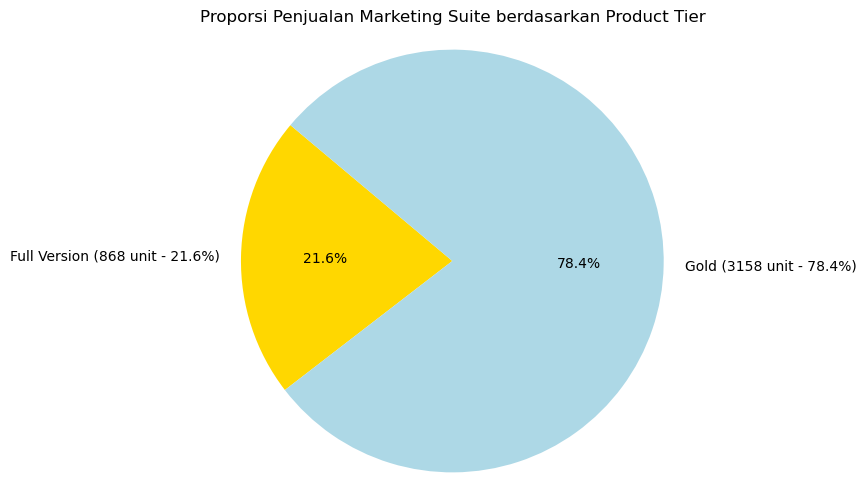

In [20]:
# Pie Char Proporsi Penjualan Product tier Marketing Suite
# Filter hanya produk "Marketing Suite"
marketing_df = df[df['Product'] == 'Marketing Suite']

# Hitung total quantity per Product Tier
tier_sales = marketing_df.groupby('Product Tier')['Quantity'].sum()

# Buat label: Nama Tier + Jumlah Unit + Persentase
labels = [f"{tier} ({qty} unit - {qty / tier_sales.sum() * 100:.1f}%)"
          for tier, qty in tier_sales.items()]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(tier_sales, labels=labels, colors=['gold', 'lightblue'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Penjualan Marketing Suite berdasarkan Product Tier')
plt.axis('equal')  # agar pie berbentuk lingkaran
plt.show()

bisa kitalihat di pie chart di atas bahwa proporsi penjualan dari marketing suite di dominasi oleh marketing Suite - Gold dengan 78%  dengan jumlah unit 3.158 unit dan Marketing Suite - Full Version sebesar 21% dengan jumlah unit 868 Unit, hal ini menandakan bahwa Pasar lebih menyukai produk marketing Suite - Gold lebih di terima di pasar dari pada product arketing Suite - Full Version. 

# Uji Normalitas 


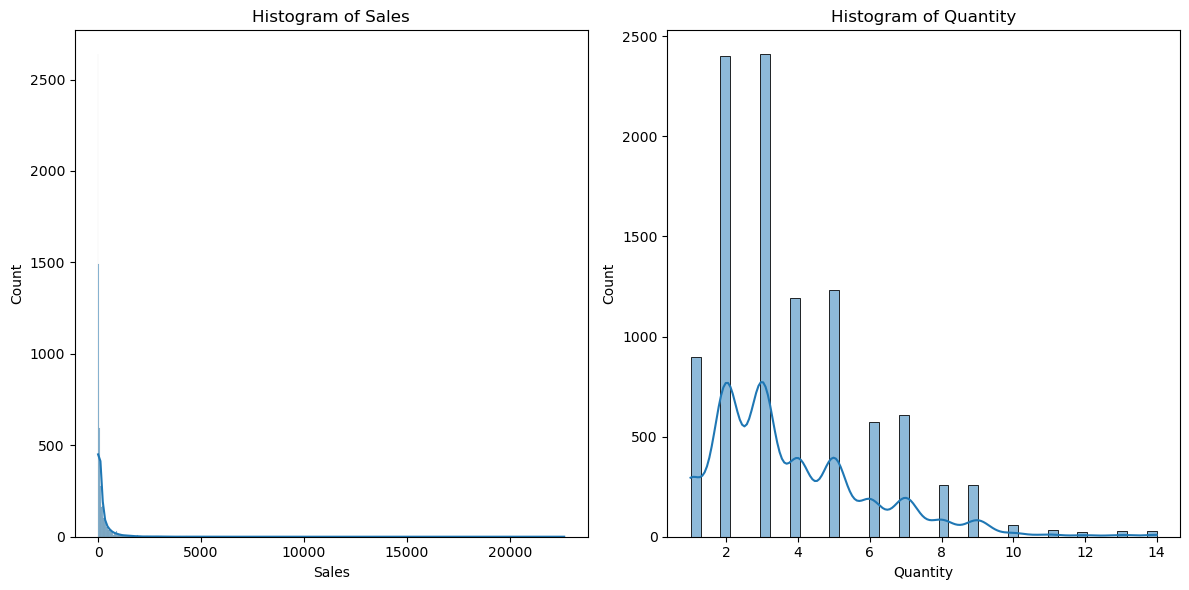

Shapiro-Wilk Test for Sales:
Statistic: 0.32332715724629535, p-value: 4.065053524283138e-105
Hasil: Menolak H0, data tidak berdistribusi normal.

Shapiro-Wilk Test for Quantity:
Statistic: 0.88239102820559, p-value: 1.5185663017552264e-65
Hasil: Menolak H0, data tidak berdistribusi normal.


In [21]:
# Visualisasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title("Histogram of Sales")

plt.subplot(1, 2, 2)
sns.histplot(df['Quantity'], kde=True)
plt.title("Histogram of Quantity")

plt.tight_layout()
plt.show()

# Uji normalitas Shapiro-Wilk
from scipy.stats import shapiro
shapiro_sales = shapiro(df['Sales'])
shapiro_quantity = shapiro(df['Quantity'])


alpha = 0.05

print("Shapiro-Wilk Test for Sales:")
print(f"Statistic: {shapiro_sales.statistic}, p-value: {shapiro_sales.pvalue}")
if shapiro_sales.pvalue < alpha:
    print("Hasil: Menolak H0, data tidak berdistribusi normal.")
else:
    print("Hasil: Gagal menolak H0, data berdistribusi normal.")

print("\nShapiro-Wilk Test for Quantity:")
print(f"Statistic: {shapiro_quantity.statistic}, p-value: {shapiro_quantity.pvalue}")
if shapiro_quantity.pvalue < alpha:
    print("Hasil: Menolak H0, data tidak berdistribusi normal.")
else:
    print("Hasil: Gagal menolak H0, data berdistribusi normal.")




 Berdasarkan hasil visualisasi histogram dan uji Shapiro-Wilk, baik data Sales maupun Quantity tidak berdistribusi normal secara signifikan. Dengan Nilai p-value untuk sales sebesar 4.065053524283138e-105 dan untuk nilai P-value untuk Quantity sebesar 1.5185663017552264e-65, berdasarkan nilai P-value sales dan quantity tersebut menjadikan cukup bukti bahwa kedua data tersebut tidak berdistribusi normal. Oleh karena itu, analisis statistik yang tidak mengasumsikan normalitas maka dari itu kita akan melanjutkan melakukan uji korelasi Spearman.

### Uji Korelasi Spearman.

In [22]:
# Korelasi Spearman
import pandas as pd
import json
from scipy.stats import spearmanr
correlation_matrix = df[['Sales', 'Quantity']].corr(method='spearman')
correlation_value, p_value = spearmanr(df['Sales'], df['Quantity'])

# Cetak hasil
print("Korelasi Spearman menggunakan .corr():")
print(correlation_matrix)

print("\nNilai Korelasi Spearman dan p-value menggunakan scipy:")
print(f"Korelasi Spearman: {correlation_value}")
print(f"p-value: {p_value}")

# Uji signifikansi
alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada hubungan linear yang signifikan antara Sales dan Quantity.")
else:
    print("Gagal menolak H0: Tidak ada hubungan linear yang signifikan antara Sales dan Quantity")

Korelasi Spearman menggunakan .corr():
             Sales  Quantity
Sales     1.000000  0.327426
Quantity  0.327426  1.000000

Nilai Korelasi Spearman dan p-value menggunakan scipy:
Korelasi Spearman: 0.32742625123650865
p-value: 2.163709507893863e-248
Tolak H0: Ada hubungan linear yang signifikan antara Sales dan Quantity.


berdasarkan hasil uji korelasi spearman bahwa Terdapat hubungan Linear yang signifikan antara Sales dan Quantity. Meskipun kekuatan hubungannya tidak tinggi (nilai korelasi Sebesar 0.327), namun pola kenaikan/penurunan antara keduanya cukup konsisten dan signifikan. Artinya, saat jumlah barang yang terjual bertambah, nilai penjualan juga cenderung meningkat.

# TOP  REGION 

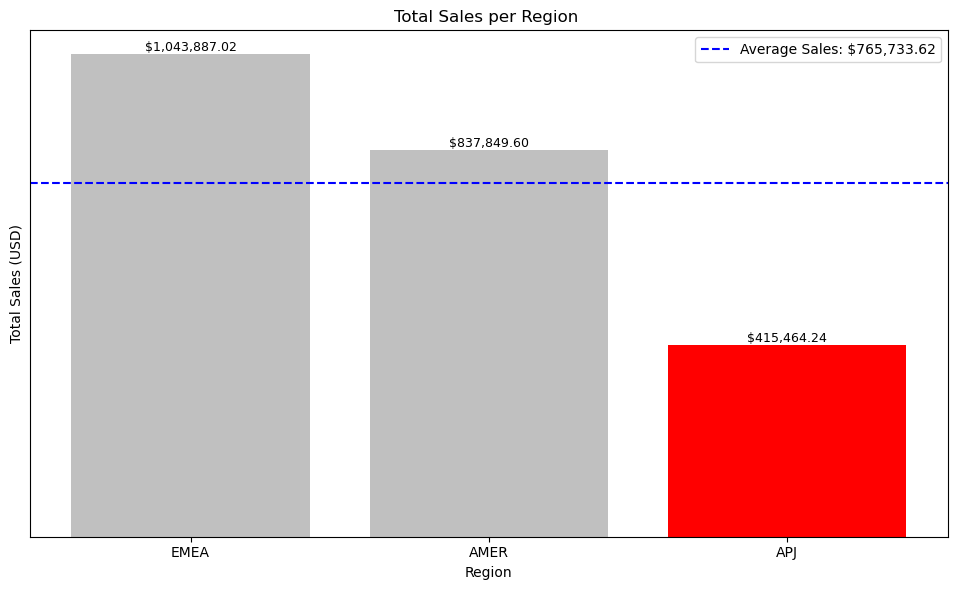

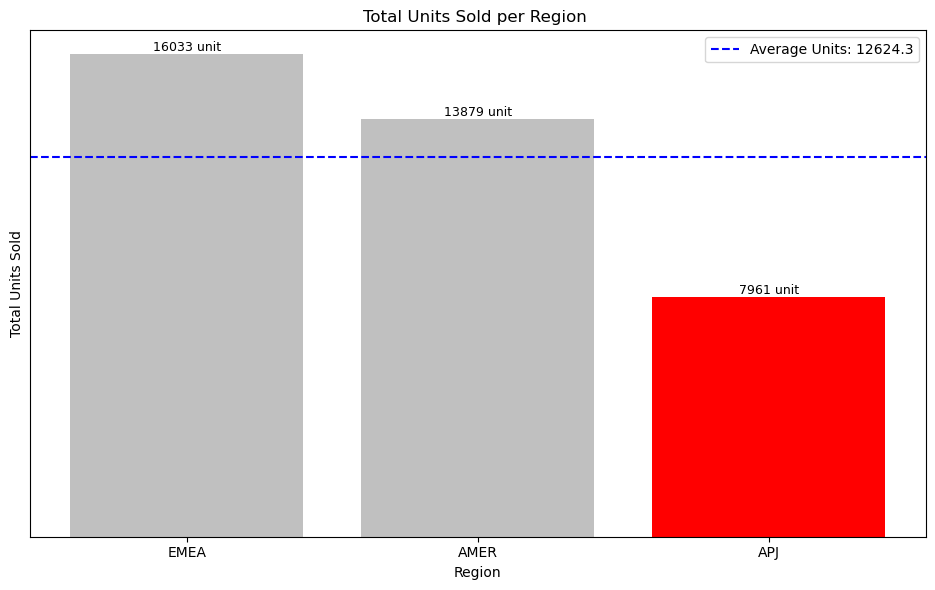

In [23]:
# A. Sales Per Region Bar
#Hitung total sales per region dan urutkan dari terbesar
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Hitung rata-rata sales
average_sales = region_sales.mean()

# Tentukan warna batang
colors = ['red' if sales < average_sales else 'silver' for sales in region_sales]

# Buat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(region_sales.index, region_sales.values, color=colors)

# Tambahkan label di atas tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f"${height:,.2f}",
             ha='center',
             va='bottom',
             fontsize=9)

# Tambahkan garis rata-rata
plt.axhline(average_sales, color='blue', linestyle='--', linewidth=1.5, label=f'Average Sales: ${average_sales:,.2f}')

# Label dan judul
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.title("Total Sales per Region ")
plt.legend()
plt.tight_layout()
plt.yticks([])
# Tampilkan plot
plt.show()

#B. Total Units Sold per region 
#Hitung total sales per region dan urutkan dari terbesar
region_quantity = df.groupby("Region")["Quantity"].sum().sort_values(ascending=False)

# Hitung rata-rata unit terjual per region
average_quantity = region_quantity.mean()

# Warna: merah jika di bawah rata-rata, silver jika di atas atau sama
colors = ['red' if qty < average_quantity else 'silver' for qty in region_quantity]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(region_quantity.index, region_quantity.values, color=colors)

# Tambahkan label unit di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f"{int(height)} unit",
             ha='center',
             va='bottom',
             fontsize=9)

# Tambahkan garis rata-rata
plt.axhline(average_quantity, color='blue', linestyle='--', linewidth=1.5,
            label=f'Average Units: {average_quantity:.1f}')

# Label dan judul
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold per Region ")
plt.legend()
plt.tight_layout()
plt.yticks([])
# Tampilkan plot
plt.show()

A. Data Insight berdasarkan total sales :
   1. Wilayah EMEA (Eropa, Timur Tengah, Afrika) mencatatkan total sales tertinggi, menyumbang hampir 40% lebih besar dibanding AMER dan lebih dari 2x lipat dibanding APJ.
   2. AMER (Amerika) menempati urutan kedua dengan total sales yang cukup kuat, namun masih sekitar 20% lebih rendah dari EMEA.
   3. APJ (Asia Pasifik & Jepang) memiliki performa total sales paling rendah secara signifikan, hanya sekitar 40% dari total penjualan AMER, dan kurang dari setengah dibanding EMEA.

B. Data Insight Berdasarkan total Unit Terjual : 
   1. EMEA mencatat jumlah tertinggi: 16.033 unit
   2. AMER berada di posisi kedua: 13.879 unit
   3. APJ tertinggal cukup jauh: 7.961 unit



Dari kedua bar chart di atas kita kita bisa mengambil kesimpulan secara berturut - turut bahwa Region APJ (Asia Pasifik dan Jepang) menjadi region penjualan terendah dengan hasil penjulan senilai $415.464 dengan sebanyak 7.961 Unit terjual. 

kita bisa mengambil kesimpulan secara berturut - turut bahwa Region APJ (Asia Pasifik dan Jepang) menjadi region penjualan terendah dengan hasil penjulan senilai $415.464 dengan sebanyak 7.961 Unit terjual. 

dari bar chart ini kita dapat menarik suatu masalah yang dapat simpulkan bahwa region APJ menjadi region yang memiliki daya pembelian terendah. di kutip (https://en.wikipedia.org/wiki/Asia%E2%80%93Pacific?utm_source=chatgpt.com) hal ini dikarenaka region APJ mayoritas di isi oleh negara - negara yang sedang berkembang seperti Tiongkok, India, Indonesia, Malaysia, Filipina, Thailand, dan Vietnam. dan hanya terdapat 4 neraga maju yaitu jepan, australia, korea selatan dan singapura ini menjadikan region APJ di kategorikan dalam Pasar Berkembang atau Emerging Market. 

Ini menjadi fokus tersendiri karena di pasar berkembang kita tidak bisa mencapai target dalam total sales dan jumlah unit yang  terjual jauh di bawah dari Regiopn EMEA (Europe, Middle East dan Africa) dan AMER (America), dikutip dari https://www.msci.com/our-solutions/indexes/market-classification mayoritas negara pada region tersebut yang termasuk dalam pasar maju. Selain karna faktor faktor tersebut  mungkin ini bisa di pengaruhi oleh diskon yang di berikan di region APJ sehingga menyebabkan jumlah sales yang sangat kecil di region tersebut, maka dari itu mari kita lakukan lebih lanjut perbandingan jumlah terjual dan sales yang terjadi di setiap region.

mari kita Lakukan uji Statistik apakah terdapat perbedaan Total Sales setiap Region. 




In [24]:
# Agregasi data: total sales dan total quantity berdasarkan region
region_summary = df.groupby("Region").agg({
    "Sales": "sum",
    "Quantity": "sum"
}).reset_index()
# Hitung rata-rata harga per unit
region_summary["Avg Price per Unit"] = region_summary["Sales"] / region_summary["Quantity"]

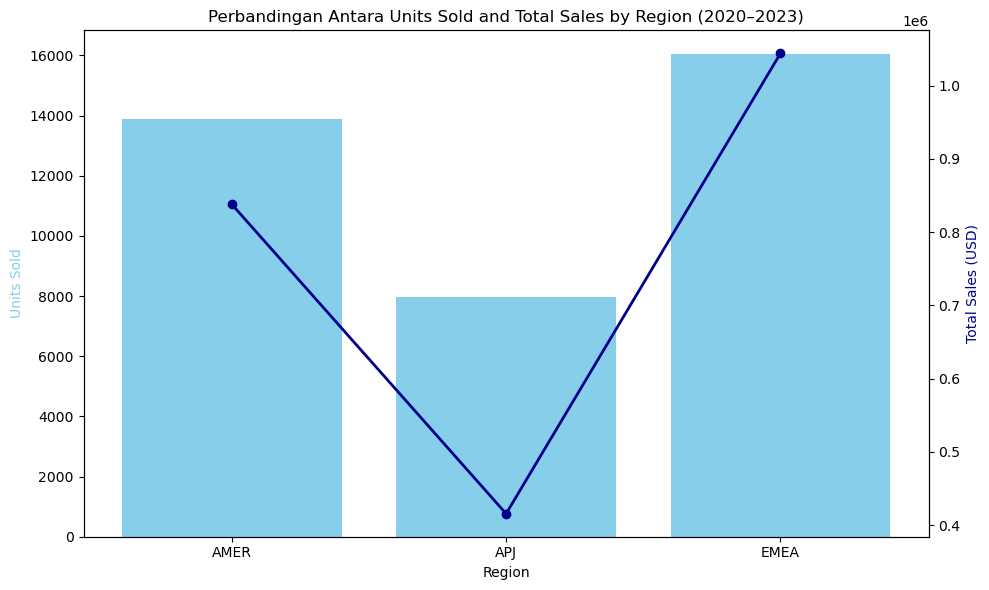

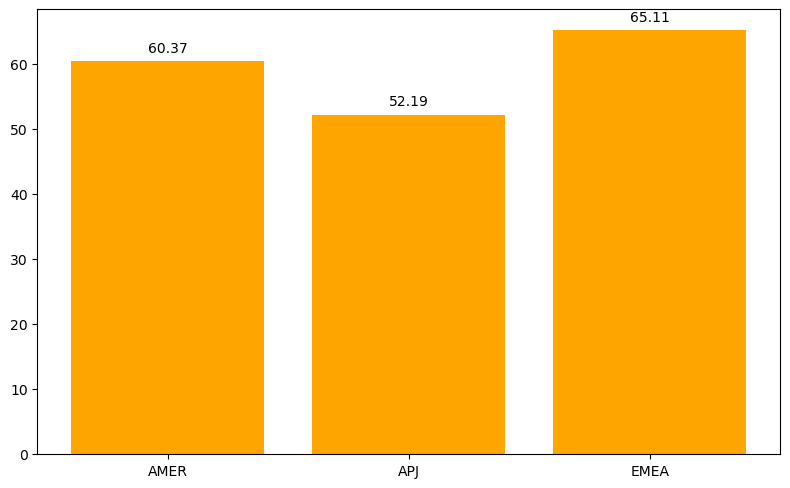

In [25]:
# Perbandingan Units Sold dan Total Sales ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart untuk Units Sold
ax1.bar(region_summary["Region"], region_summary["Quantity"], color='skyblue', label='Units Sold')
ax1.set_ylabel('Units Sold', color='skyblue')
ax1.set_xlabel('Region')

# Line chart untuk Total Sales (pakai axis kedua)
ax2 = ax1.twinx()
ax2.plot(region_summary["Region"], region_summary["Sales"], color='darkblue', marker='o', linewidth=2, label='Total Sales')
ax2.set_ylabel('Total Sales (USD)', color='darkblue')

# Judul
ax1.set_title('Perbandingan Antara Units Sold and Total Sales by Region (2020–2023)')
fig.tight_layout()
plt.show()

# Rata-rata Harga per Unit ---
# --- Plot: Average Price per Unit dengan Label ---
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(region_summary["Region"], region_summary["Avg Price per Unit"], color='orange')

# Tambahkan label di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        f'{yval:.2f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

setelah kita lihat kedua bar chart di atas bisa kita tarik kesimpulan bahwa EMEA merupakan pasar paling kuat dengan penjualan terbesar dan harga produk tertinggi, menandakan nilai produk yang lebih premium. AMER menunjukkan performa seimbang antara volume dan nilai penjualan, sementara APJ meskipun memiliki volume penjualan yang cukup tinggi, nilai penjualan lebih rendah karena harga per unit yang lebih murah. Strategi harga dan segmentasi pasar di tiap wilayah perlu disesuaikan untuk memaksimalkan potensi penjualan dan keuntungan.

In [26]:
region_apj = df[df['Region'] == 'APJ']['Sales']
region_emea = df[df['Region'] == 'EMEA']['Sales']
region_amer = df[df['Region'] == 'AMER']['Sales']

# Uji normalitas
stat_apj, p_apj = shapiro(region_apj)
stat_emea, p_emea = shapiro(region_emea)
stat_amer, p_amer = shapiro(region_amer)

# Cetak hasil
print("Hasil Uji Normalitas (Shapiro-Wilk):")
print(f"APJ:     p-value = {p_apj:.4f}")
print(f"EMEA:    p-value = {p_emea:.4f}")
print(f"AMER:    p-value = {p_amer:.4f}")

# Interpretasi
for region, p_val in zip(["APJ", "EMEA", "AMER"], [p_apj, p_emea, p_amer]):
    if p_val < 0.05:
        print(f"{region}: Distribusi TIDAK normal")
    else:
        print(f"{region}: Distribusi normal")

Hasil Uji Normalitas (Shapiro-Wilk):
APJ:     p-value = 0.0000
EMEA:    p-value = 0.0000
AMER:    p-value = 0.0000
APJ: Distribusi TIDAK normal
EMEA: Distribusi TIDAK normal
AMER: Distribusi TIDAK normal


dari hasil uji normalitas menggunakan Shapiro kita mendapatkan bahwah nilai P- Value dari masing Masing Region adalah 0.000, hal ini menjadikan cukup bukti bahwa nilai dari P-value lebih kecil dari 0.05 dan dapat di nyatakan bahwa data total sales di setiap region tidak berdistribusi normal. maka dari itu kita akan lanjutakn dengan metode uji non Parametrik dengan metode Kruskall - Wallis.


In [27]:
#Uji Kruskall - Walis 
# Uji Kruskal-Wallis
from scipy.stats import kruskal
h_stat, p_val = kruskal(region_apj, region_emea, region_amer)

print("Hasil Uji Kruskal-Wallis")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Terdapat perbedaan signifikan dalam total sales antar region.")
else:
    print("Tidak terdapat perbedaan signifikan dalam total sales antar region.")

Hasil Uji Kruskal-Wallis
H-statistic: 36.2496
p-value: 0.0000
Terdapat perbedaan signifikan dalam total sales antar region.


Setelah kita lakukan Uji Kruskall - Wallis kita mendapatkan nilai P-value Sebesar 0.000 dan H-Statistic Sebesar 36.2496, hal ini menjadikan cukup bukti bahwa Terdapat perbedaan signifikan dalam total sales antar region karena nilai P-Value lebih kecil dari 0.05.  Setelah ini mari kita melihat tren sales dan jumlah unit terjual dalam Region APJ (Asia Pasifik dan Jepang) apakah tren sales dan order cenderung naik atau menurun

# ANALISA MARKET REGION APJ 

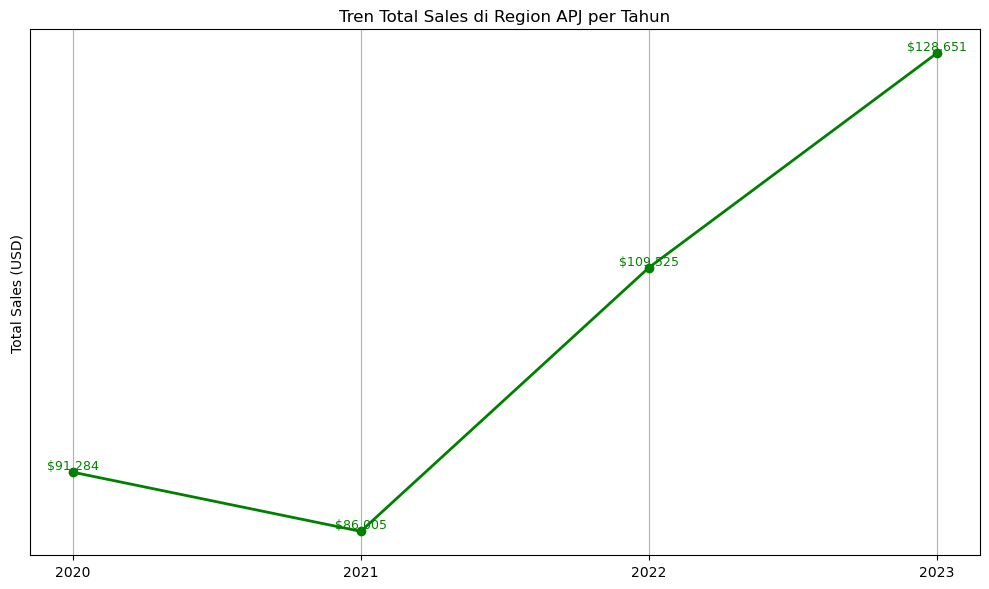

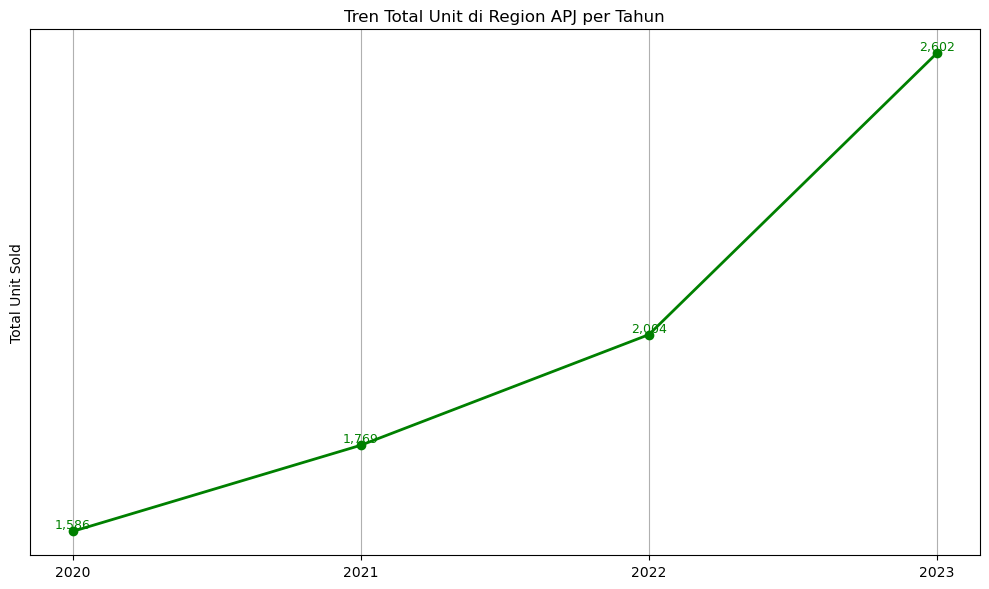

In [28]:
# A. Tren Sales di Region APJ
# Filter untuk region APJ
df_apj = df[df["Region"] == "APJ"]

# Group berdasarkan tahun
apj_sales_trend = df_apj.groupby("Year")["Sales"].sum().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sales dengan marker
ax.plot(apj_sales_trend.index, apj_sales_trend.values, marker='o', color='green', linewidth=2)

# Tambahkan label angka di atas tiap marker
for year, sales in apj_sales_trend.items():
    ax.text(year, sales, f"${sales:,.0f}", ha='center', va='bottom', fontsize=9, color='green')

# Hilangkan y-axis
ax.set_yticks([])


# Pastikan tahun tampil bulat
ax.set_xticks(apj_sales_trend.index)
ax.set_xticklabels(apj_sales_trend.index.astype(int))

# Tambahkan judul
plt.title("Tren Total Sales di Region APJ per Tahun")
plt.ylabel("Total Sales (USD)")
plt.grid(True, axis='x')
plt.tight_layout()

# Tampilkan plot
plt.show()

#B. Tren Penjualan Unit 


# Group berdasarkan tahun
apj_Quantity_trend = df_apj.groupby("Year")['Quantity'].sum().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sales dengan marker
ax.plot(apj_Quantity_trend.index, apj_Quantity_trend.values, marker='o', color='green', linewidth=2)

# Tambahkan label angka di atas tiap marker
for year, quantity in apj_Quantity_trend.items():
    ax.text(year, quantity, f"{quantity:,.0f}", ha='center', va='bottom', fontsize=9, color='green')

# Hilangkan y-axis
ax.set_yticks([])


# Pastikan tahun tampil bulat
ax.set_xticks(apj_Quantity_trend.index)
ax.set_xticklabels(apj_Quantity_trend.index.astype(int))

# Tambahkan judul
plt.title("Tren Total Unit di Region APJ per Tahun")
plt.ylabel("Total Unit Sold")
plt.grid(True, axis='x')
plt.tight_layout()

# Tampilkan plot
plt.show()

A. Data Insight Tren Sales Region APJ :

    1. 2020–2021: Penurunan Sales dari sekitar $ 5.279
    2. 2021–2023: Terjadi lonjakan signifikan, dengan Sales meningkat menjadi $109.525 di 2022 dan $128.651 di 2023
    3. Terjadi Pertumbuhan Sales yang signifikan dari tahun 2022 - 2023 sebesar 50 %

B. Data Insight Tren Total Units Terjual Region APJ :

    1. 2020–2023: terjadi tren peningkatan jumlah unit terjual yang konsisten (tidak mengalami penurunan)
    2. 3 tahun perrtumbungan total unit terjual sekitar 62%
    3. rata rata peningkatan unit terjual setiap tahun nya  sebesar 338 Unit atau sebesar 18 % per tahun




Terdapat penurunan di tahun 2021, nilai penjualan sebesar $86.005 lebih kecil di bandingan dengan tahun 2020 yang memiliki nilai $90.282. tetapi bila kita lihat dari toal jumlah unit terjual di tahun 2021 sebanyak 1.769 unit sedangkan tahun 2020 sebenyak 1.586 Unit mengalami kenaikan, hal ini di pengaruhi karena kan wabah virus covid-19 yang menjangkit seluruh dunia dan di kutip  https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Inflation terdapat lonjakan inflasi yang terjadi pada masa pemulihan ekonomi global pasca pandemi covid-19, sehingga hal ini mengakibatkan banyak perusahaan yang melakukan efisiensi anggaran belanja mereka. 
dan di sini juga kita bisa melihat bahwa tren sales di region APJ mengalami kenaikan di rentang tahun 2021 - 2023 tetapi tren kenaikan ini tidak terlalu signifikan, dan hal ini juga belaku untuk tren total unit terjual pada Region APJ. dari tahun 2020 - 2023 dimana rata rata kenaikan jumlah unit 338 atau sebesar 18% melihat dari mayoritas dari Region APj ini termasuk dalam Negara dengan pasar berkembang, seharus nya kita bisa meningkatkan penjualan pada negara dengan pasar berkembang, mari kita analisa lebih dalam dengan melihat jumlah pembelian dan sales di setiap negara yang terdapat di region APJ ini.

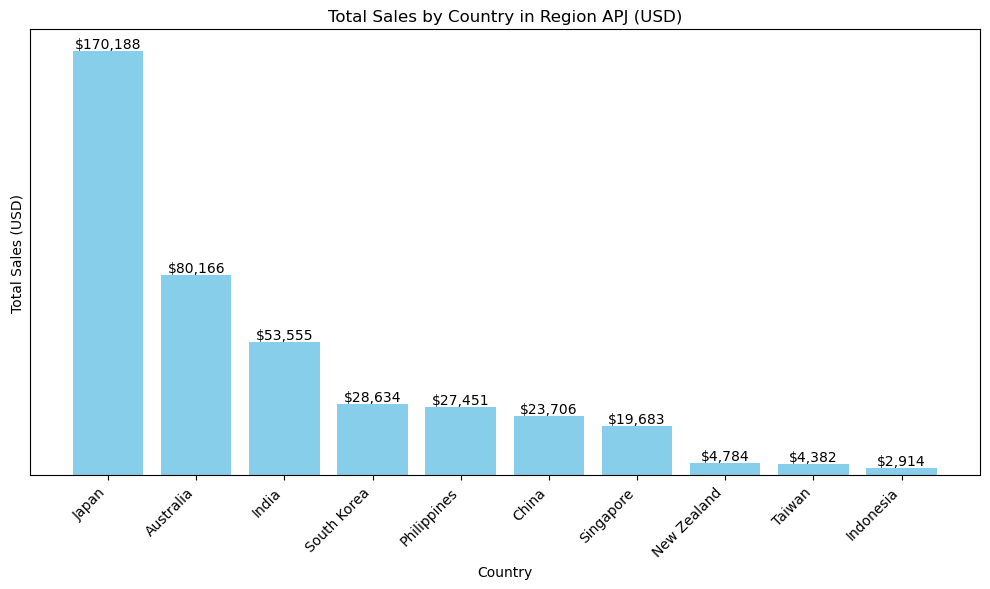

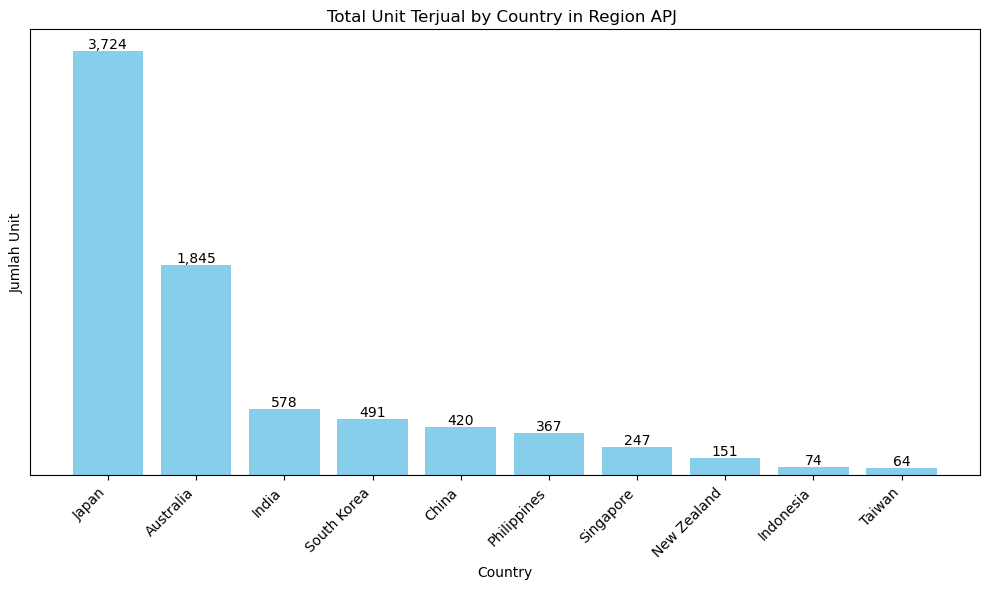

In [29]:
#  
# A. total Sales Region APJ per Country
# Hitung total sales per negara dan urutkan dari terbesar
sales_by_country = df_apj.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_country.index, sales_by_country.values, color='skyblue')
plt.title('Total Sales by Country in Region APJ (USD)')
plt.xlabel('Country')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45, ha='right')

# Tambahkan label angka di atas setiap bar dengan format USD
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.0f}', va='bottom', ha='center')
plt.yticks([])
plt.tight_layout()
plt.show()

#B, Total Penjualan Unit di region APJ Per negara 
quantity_by_country = df_apj.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(quantity_by_country.index, quantity_by_country.values, color='skyblue')
plt.title('Total Unit Terjual by Country in Region APJ ')
plt.xlabel('Country')
plt.ylabel('Jumlah Unit')
plt.xticks(rotation=45, ha='right')

# Tambahkan label angka di atas setiap bar dengan format USD
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center')
plt.yticks([])
plt.tight_layout()
plt.show()

A. Data Insight Berdasarkan total Sales:

    1. Perfoma sales di Jepan tembus diatas $150.000 menjadikan top perfoma sales.
    2. Australia dan India Mid perfoma sales dengan total sales diatas $50.000
    3. South Korea, Philippine dan China low perfoma sales diatas $ 20.000
    4. Singapore, New Zealand, Taiwan dan Indonesia termasuk dalam very low Perfoma sales karena kurang dari $20.000

B. Data Insight Berdasarkan total unit terjual:

    1. Jepang mendominasi dengan 3724 unit – kontributor terbesar.
    2. Australia di posisi kedua (1845 unit) – jauh di atas negara lainnya.
    3. India, Korea Selatan, dan Filipina berada di kelas menengah – potensi untuk ditingkatkan.
    4. Singapura, Taiwan, Indonesia, dan Selandia Baru menunjukkan angka rendah – perlu strategi khusus


Bisa kita lihat dari kedua chart diatas bawah penyokong utama dari region APJ adalah Negara Jepan dengan nilai total penjualan sebesar $170.188 dan jumlah unit terjual sebanyak 3.724 unit. bisa kita lihat juga bahwa terjadi ketimpangan atau ketidak merataan baik dari angka total sales dan jumlah unit terjual yang terjadi di region APJ, ini bisa menandakan bahwa strategi marketing yang kita gunakan kurang efektif di negara wilayah APJ dan yang di kategorikan sebagi negara berkembang.

# Kesimpulan Akhir dan Saran 



***Kesimpulan Akhir***

1. Terdapat perbedaan signifikan penjualan antar wilayah:  EMEA unggul,   AMER mid , APJ tertinggal, Hal ini mengindikasikan adanya kesenjangan efektivitas strategi pemasaran antar regional.
2. Beberapa pasar seperti India, Filipina, dan Indonesia menunjukkan potensi pertumbuhan yang belum dimaksimalkan.
3. Diperlukan penyesuaian strategi berbasis lokal untuk meningkatkan performa wilayah dengan kontribusi rendah

***Rekomendasi*** 
Berdasarkan kesimpulan tersebut berikut ini  rekomendasi yang bisa di pertimbangkan.

1. Kesenjangan Penjualan Antar Wilayah
    Wilayah EMEA menunjukkan performa yang lebih unggul dibandingkan dengan APJ dan AMER dalam hal total penjualan maupun unit yang terjual. Diperlukan segmentasi strategi yang lebih tepat guna, disesuaikan dengan karakteristik dan dinamika pasar masing-masing regional. Hal ini mencakup adaptasi dalam pendekatan pemasaran, model distribusi, produk unggulan, hingga pricing strategy yang relevan untuk tiap wilayah.

    Dampak Bisnis:
    Penyesuaian strategi secara cepat dan tepat akan membantu mengoptimalkan potensi pasar di wilayah APJ dan AMER, serta mengurangi risiko kehilangan momentum atau peluang pasar akibat strategi yang tidak sesuai. Dengan pendekatan regional yang lebih adaptif, perusahaan dapat menciptakan pertumbuhan yang lebih merata secara global dan memperkuat daya saing di tiap kawasan.

2. Identifikasi Wilayah Potensial

    India, Filipina, dan Indonesia saat ini menunjukkan volume penjualan yang masih rendah, namun memiliki potensi pasar yang besar seiring pertumbuhan ekonomi dan digitalisasi yang pesat.Perusahaan perlu memanfaatkan peluang ini dengan mengembangkan strategi penetrasi pasar yang agresif namun terukur, seperti penawaran produk dengan harga terjangkau, pendekatan pemasaran lokal yang relevan, serta pemanfaatan mitra distribusi lokal.

    Dampak Bisnis:
    Strategi ini berpotensi mempercepat ekspansi bisnis dengan biaya akuisisi pelanggan yang lebih rendah, memperluas basis pelanggan di wilayah dengan pertumbuhan tinggi, serta membantu menyamakan tingkat pertumbuhan bisnis antar negara di kawasan. Dalam jangka panjang, hal ini dapat menciptakan diversifikasi pasar yang sehat dan mengurangi ketergantungan terhadap negara dengan pasar yang sudah matang.

3. Optimalisasi Produk Unggulan

    a. Promosi dan Bundling Produk Potensial
    Fokuskan upaya pemasaran pada produk unggulan dengan melakukan promosi intensif serta menawarkan paket bundling yang menggabungkan produk unggulan dengan produk yang masih dalam tahap penetrasi pasar.

    Dampak Bisnis:
    Strategi ini berpotensi meningkatkan pendapatan secara signifikan melalui cross-selling, memperluas jangkauan pasar, serta meningkatkan persepsi nilai dari penawaran produk secara keseluruhan.

    b.Optimisasi Portofolio Produk
    Lakukan evaluasi berkala terhadap performa seluruh produk yang ada. Produk dengan performa rendah sebaiknya diperbaiki atau dihentikan, sehingga sumber daya perusahaan dapat difokuskan pada produk yang memiliki kontribusi tinggi terhadap profitabilitas.

    Dampak Bisnis:
    Hal ini akan menciptakan efisiensi operasional, meningkatkan return on investment (ROI), serta memungkinkan tim pengembangan dan pemasaran untuk lebih fokus pada penguatan produk yang memberikan hasil terbaik.

    c.Strategi Berbasis Data untuk Profitabilitas
    Manfaatkan data penjualan, biaya operasional, margin keuntungan, dan umpan balik pelanggan sebagai dasar pengambilan keputusan terkait pengembangan produk, penetapan harga, dan strategi pemasaran.

    Dampak Bisnis:
    Pendekatan ini akan memastikan setiap keputusan berbasis pada fakta, memperkuat daya saing produk, serta meningkatkan profitabilitas perusahaan secara menyeluruh.

Wilayah EMEA menunjukkan performa yang lebih unggul dibandingkan dengan APJ dan AMER dalam hal total penjualan maupun unit yang terjual. Diperlukan segmentasi strategi yang lebih tepat guna, disesuaikan dengan karakteristik dan dinamika pasar masing-masing regional. Hal ini mencakup adaptasi dalam pendekatan pemasaran, model distribusi, produk unggulan, hingga pricing strategy yang relevan untuk tiap wilayah.

Dampak Bisnis:
Penyesuaian strategi secara cepat dan tepat akan membantu mengoptimalkan potensi pasar di wilayah APJ dan AMER, serta mengurangi risiko kehilangan momentum atau peluang pasar akibat strategi yang tidak sesuai. Dengan pendekatan regional yang lebih adaptif, perusahaan dapat menciptakan pertumbuhan yang lebih merata secara global dan memperkuat daya saing di tiap kawasan.

### Import to Json 

In [ ]:
df.to_excel('data_SaaS_Clean.xlsx', index=False)
